In [21]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [22]:
df= sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
df.drop(columns=['pclass','sex','parch','sibsp','embarked','class','who','adult_male','deck','embark_town','alive','alone'],inplace=True)

In [24]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14448\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [26]:
df.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

In [27]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['survived']),
                                               df['survived'],test_size=0.2,random_state=42)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14448\3017749406.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


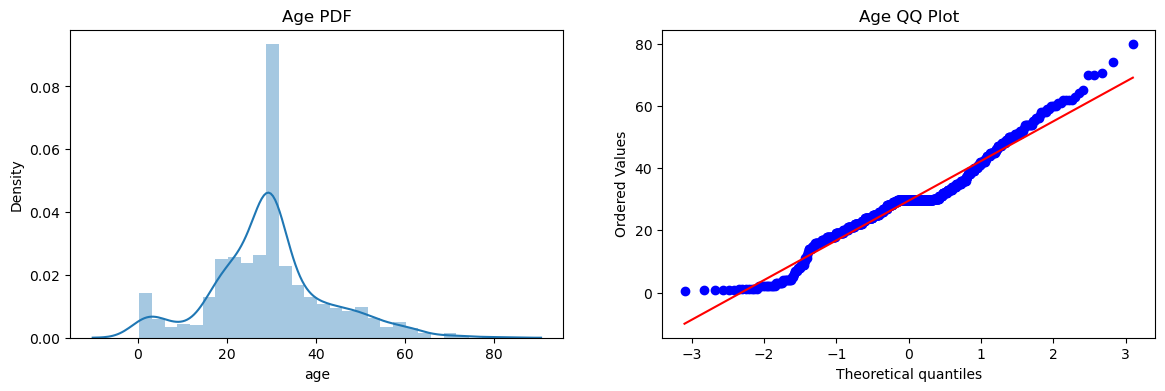

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_14448\586049428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])


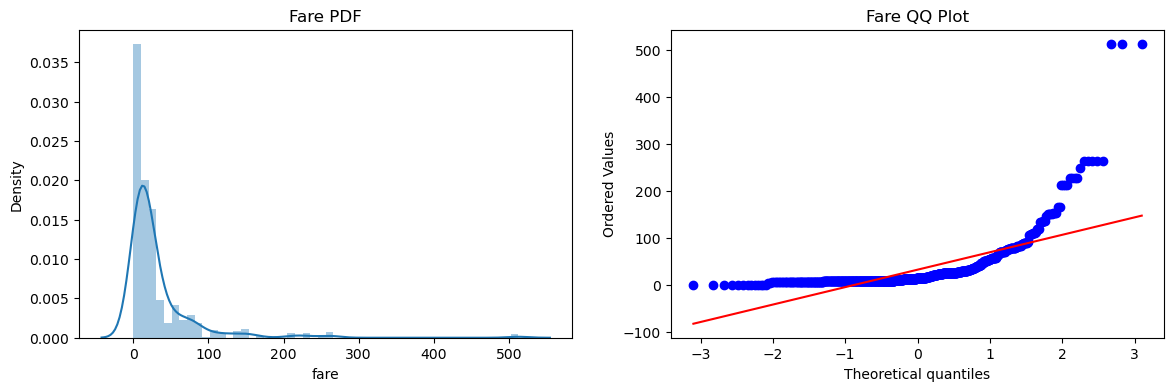

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

plt.show()


In [30]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

In [32]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

print("accuracy_score of Logistic Regression",accuracy_score(y_test,y_pred1))
print("accuracy_score of Decision Tree ",accuracy_score(y_test,y_pred2))



accuracy_score of Logistic Regression 0.6480446927374302
accuracy_score of Decision Tree  0.6536312849162011


In [33]:
trf=FunctionTransformer(func=np.log1p)

In [34]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [36]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred1=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

print("accuracy_score of Logistic Regression",accuracy_score(y_test,y_pred1))
print("accuracy_score of Decision Tree ",accuracy_score(y_test,y_pred2))



accuracy_score of Logistic Regression 0.6815642458100558
accuracy_score of Decision Tree  0.6871508379888268


In [39]:
X_transformed =trf.fit_transform(df.drop(columns=['survived']))

clf= LogisticRegression()
clf2 =DecisionTreeClassifier()

print("Logistic Regression",np.mean(cross_val_score(clf,X_transformed,df['survived'],scoring='accuracy',cv=10)))
print("Decision Tree",np.mean(cross_val_score(clf,X_transformed,df['survived'],scoring='accuracy',cv=10)))




Logistic Regression 0.678027465667915
Decision Tree 0.678027465667915


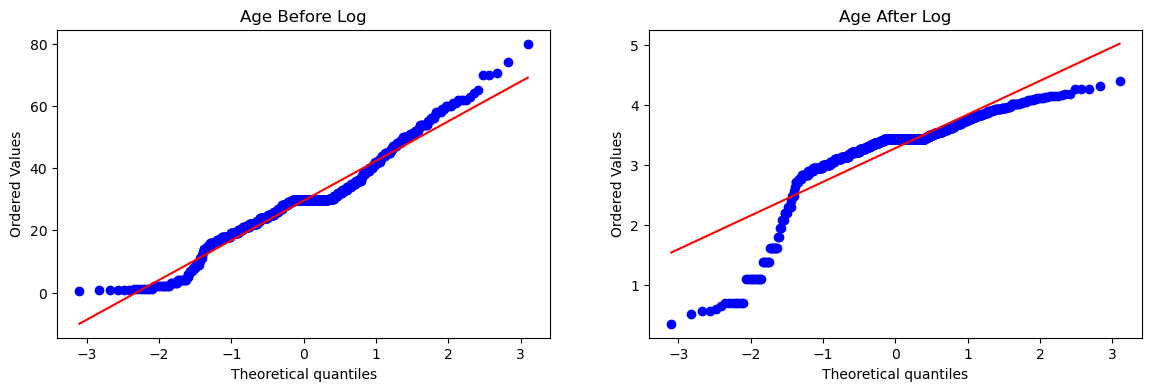

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['age'],dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['age'],dist='norm',plot=plt)
plt.title("Age After Log")
plt.show()

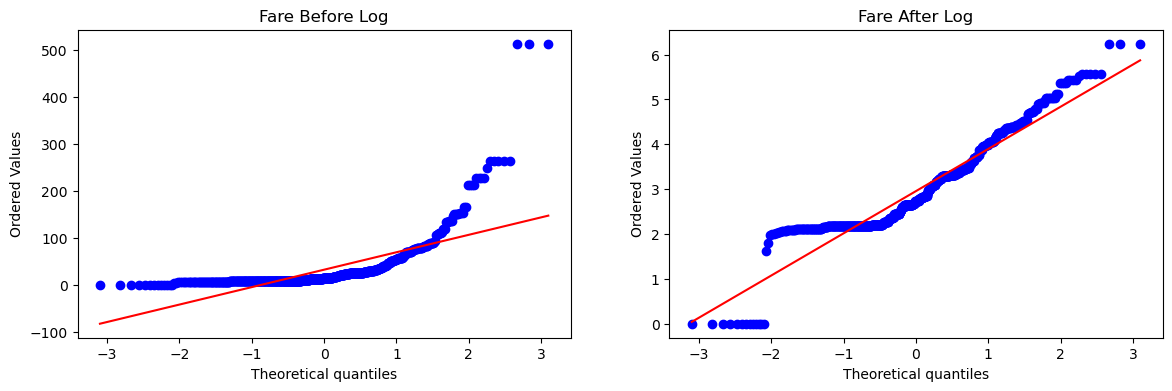

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['fare'],dist='norm',plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['fare'],dist='norm',plot=plt)
plt.title("Fare After Log")
plt.show()

In [45]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [46]:
clf= LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred2=clf2.predict(X_test_transformed2)

print("Accuracy for Logistic Regression:", accuracy_score(y_test, y_pred))
print("Accuracy for Decision Tree Classifier:", accuracy_score(y_test, y_pred2))

Accuracy for Logistic Regression: 0.6703910614525139
Accuracy for Decision Tree Classifier: 0.6759776536312849


In [48]:
X_transformed2 =trf2.fit_transform(df.drop(columns=['survived']))

clf= LogisticRegression()
clf2 =DecisionTreeClassifier()

print("Logistic Regression",np.mean(cross_val_score(clf,X_transformed2,df['survived'],scoring='accuracy',cv=10)))
print("Decision Tree",np.mean(cross_val_score(clf2,X_test_transformed2,df['survived'],scoring='accuracy',cv=10)))




Logistic Regression 0.6712609238451936


ValueError: Found input variables with inconsistent numbers of samples: [179, 891]

In [49]:
def apply_transform(transform):
    X= df.iloc[:,1:3]
    y=df.iloc[:,0]
    trf= ColumnTransformer([('log', FunctionTransformer(transform),['fare'])],remainder='passthrough')

    X_trans=trf.fit_transform(X)
    clf =LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)

    stats.probplot(X['fare'],dist='norm',plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare After Transform')
    plt.show()

Accuracy 0.6431335830212235


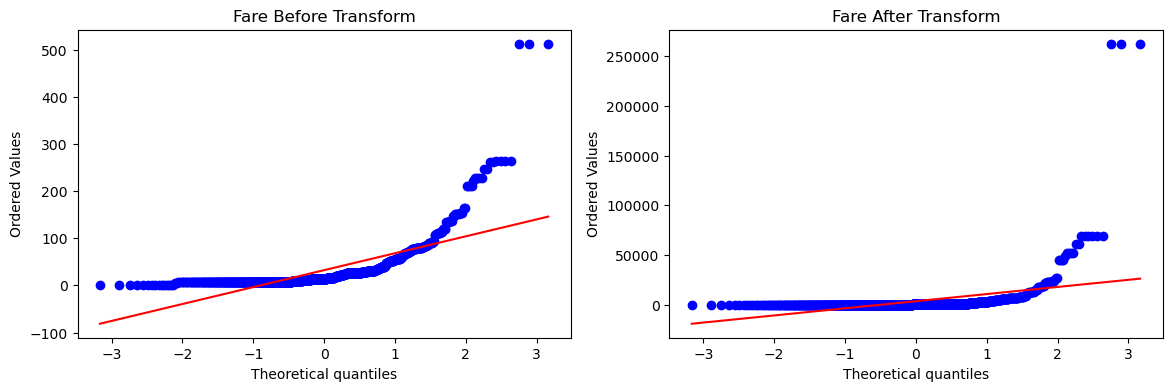

In [50]:
apply_transform(lambda x: x**2)